# Working with complicated dataset

Your name:

### Question 1

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [52]:
### Your code here . . .
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

headers = [
    'query acc.ver', 'subject acc.ver', '% identity', 'alignment length', 'mismatches', 'gap opens',
    'q. start', 'q. end', 's. start', 's. end', 'evalue', 'bit score', '% positives', 'bonds', 'publications'
]
blast_results = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv",
                            comment='#', skiprows = 7, names = headers, usecols = headers, na_values = ['-'], thousands = ',')

blast_results.columns = headers
blast_results = blast_results.drop(columns=['query acc.ver']).set_index('subject acc.ver')

blast_results.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0
AGK29621.1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0
YP_220563.1,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0
ACM24502.1,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0
AHG32084.1,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0


### Question 2
What is the average number of publications?

In [23]:
### Your code here . . .
blast_results['publications'].mean()

26.989690721649485

### Question 3
List the `subject acc.ver` that has over 15,000 bonds.

In [24]:
### Your code here . . .
pd.DataFrame(blast_results[blast_results['bonds'] > 15000].index)

,subject acc.ver
0,AGK29621.1
1,AHG32084.1
2,6G2J_H
3,YP_002791042.1
4,AGK29634.1
5,0806162F
6,YP_009112408.1
7,YP_001876469.1
8,YP_009092269.1
9,AHG32149.1


### Question 4
Create a plot that shows the correlation between `% identity` and `% positives`.

Text(0.5, 1.0, 'Correlation between % identity and % positives')

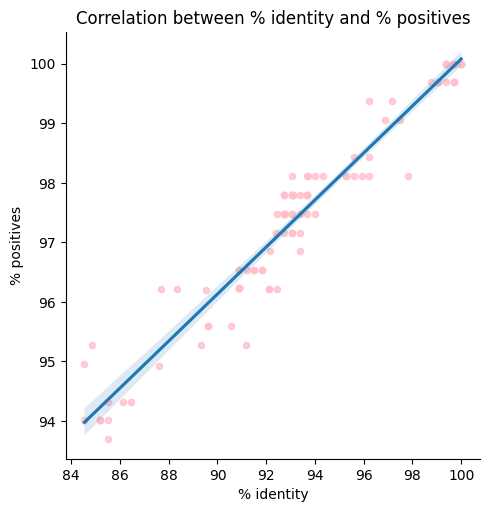

In [59]:
### Your code here . . .
sns.lmplot(data=blast_results, x='% identity', y='% positives', scatter_kws={'s': 20, 'color': 'pink'})
plt.title('Correlation between % identity and % positives')

### Question  5
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [62]:
### Your code here . . .
protein_source = pd.read_csv("https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv")
protein_source = protein_source.drop(columns=['Unnamed: 0'])

# Merge the protein source data with the blast_results dataframe on subject acc.ver and Protein
merged_results = pd.merge(blast_results, protein_source, how='left', left_index=True, right_on='Protein').reset_index(drop=True)
merged_results = merged_results.drop(columns=['Protein'])

merged_results = merged_results.rename(columns={'Source': 'Protein source'})
merged_results['Protein source'] = merged_results['Protein source'].fillna("NA")
merged_results

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,Protein source
0,100.000,318,0,0,1,318,1,318,0,629,100.00,1487,9.0,RefSeq
1,99.686,318,1,0,1,318,1,318,0,629,100.00,17947,47.0,NA
2,99.686,318,1,0,1,318,1,318,0,627,100.00,12106,13.0,GenPept
3,99.686,318,1,0,1,318,1,318,0,627,99.69,2319,41.0,NA
4,99.371,318,2,0,1,318,1,318,0,627,100.00,18964,3.0,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,92.767,318,23,0,1,318,1,318,0,551,97.48,17348,6.0,NA
96,93.375,317,21,0,1,317,1,317,0,551,96.85,7105,19.0,NA
97,84.543,317,49,0,1,317,1,317,0,551,94.01,18940,37.0,GenPept
98,85.174,317,47,0,1,317,1,317,0,551,94.01,18762,5.0,GenPept
